In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

filepath = r"C:\Users\GS Adithya Krishna\Documents\python projects\kmeans\Wholesale customers data.csv"



In [ ]:

df_numeric = df.select_dtypes(include=[np.number])  
df_numeric = (df_numeric - df_numeric.mean()) / df_numeric.std()

        PC1       PC2
0  0.842979 -0.514765
1  1.061468 -0.484050
2  1.267697  0.681279
3 -1.055581  0.610127
4  0.633310  0.973091


C:\Users\GS Adithya Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


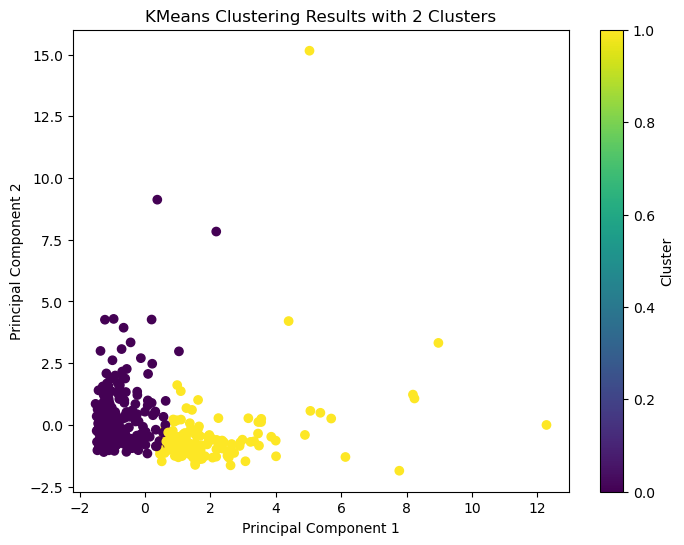

C:\Users\GS Adithya Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


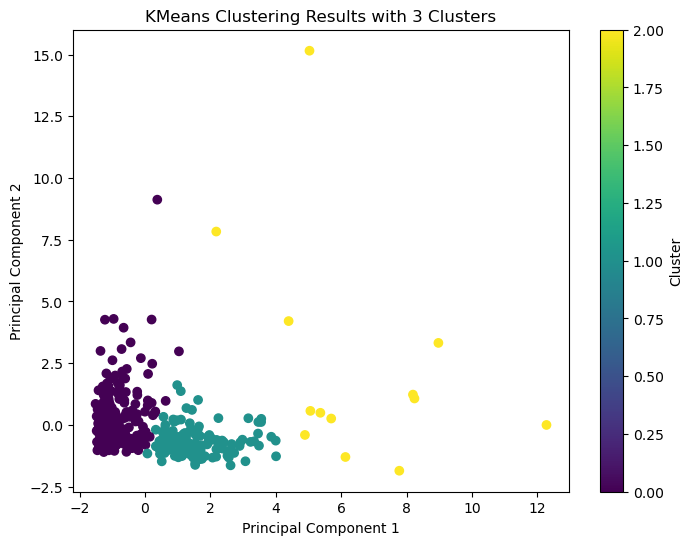

C:\Users\GS Adithya Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


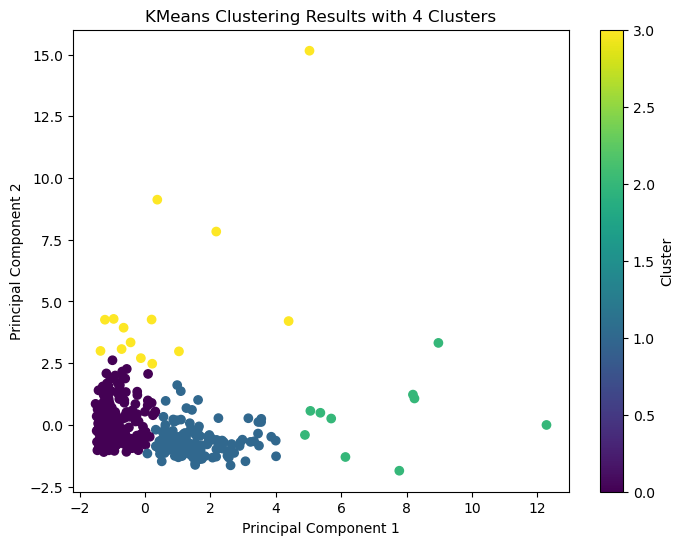

C:\Users\GS Adithya Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


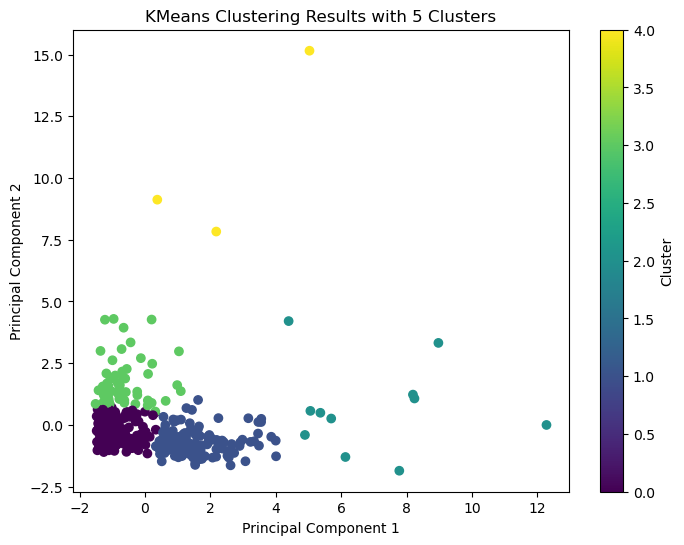

C:\Users\GS Adithya Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


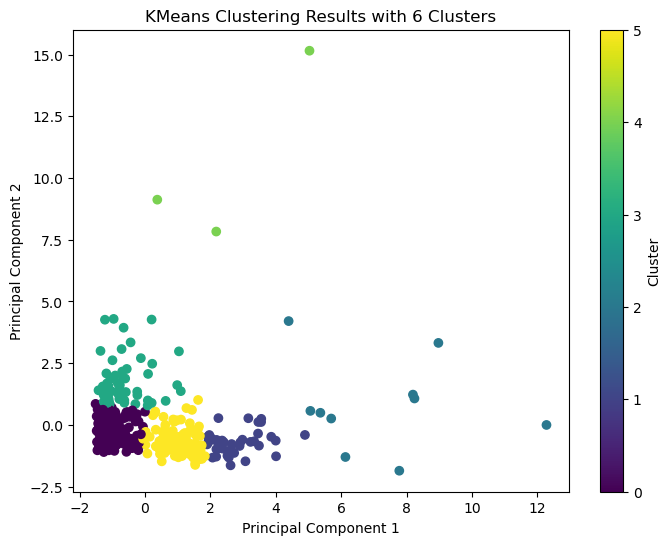

C:\Users\GS Adithya Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


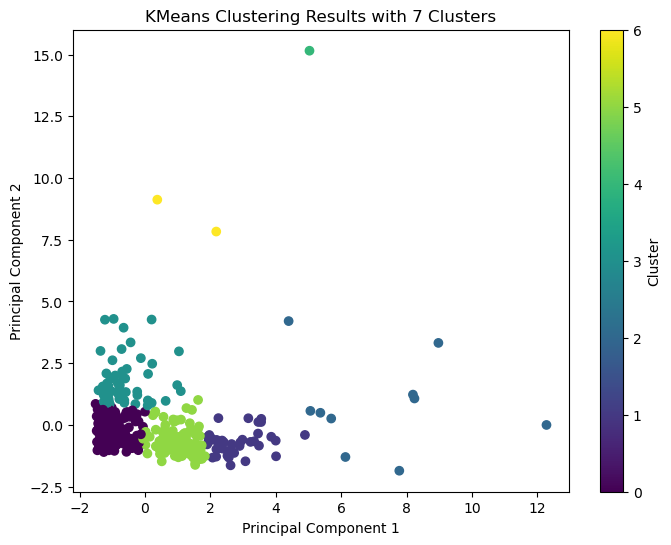

C:\Users\GS Adithya Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


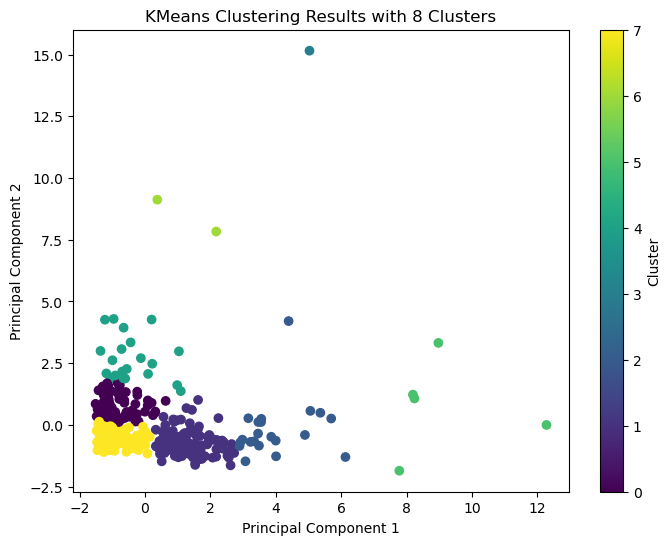

C:\Users\GS Adithya Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


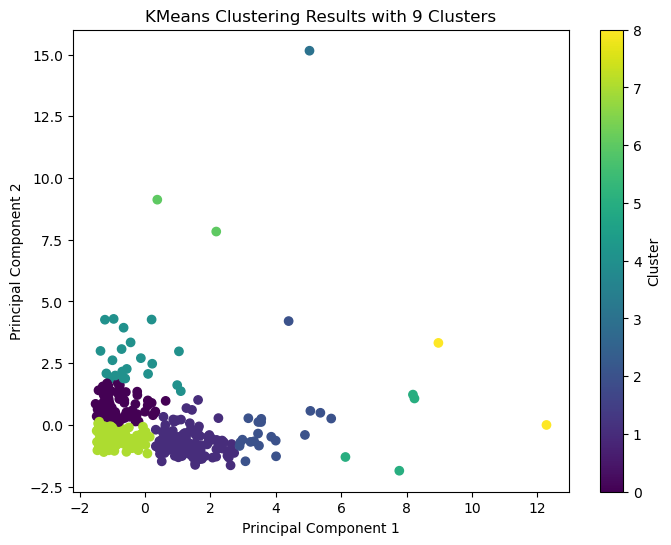

In [3]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_numeric)
pca_df = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])
print(pca_df.head())

clusternum = [i for i in range(2, 10)]  
silhouette_scores = []

for i in clusternum:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pca_df)
    predicted_clusters = kmeans.labels_
    
    if i > 1:  
        silhouette_avg = silhouette_score(pca_df, predicted_clusters)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)
    

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=predicted_clusters, cmap='viridis')
    plt.colorbar(label='Cluster')
    plt.title(f'KMeans Clustering Results with {i} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

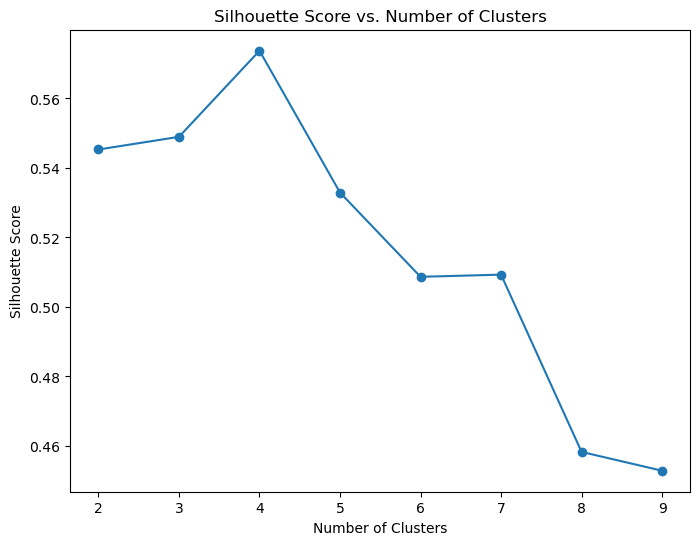

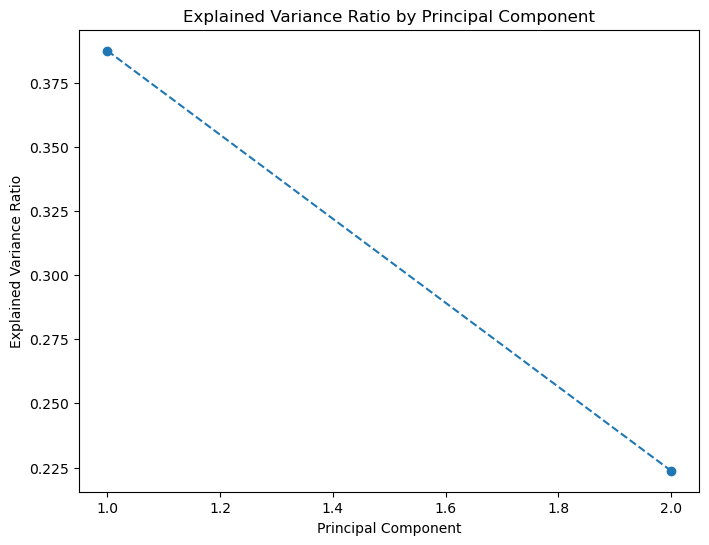

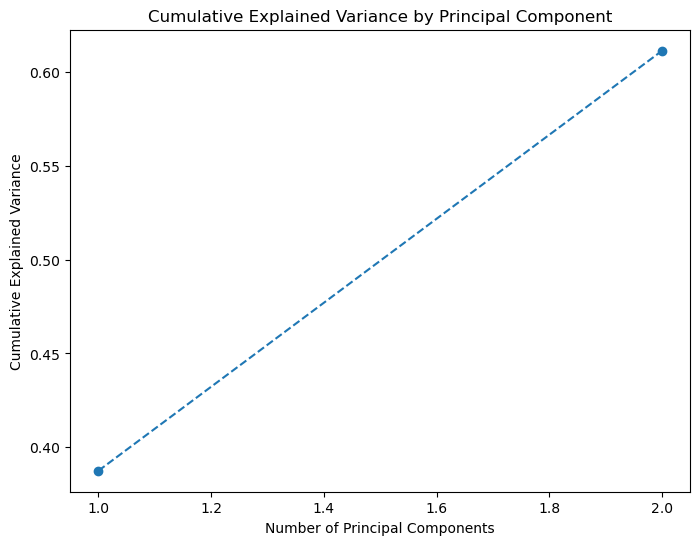

In [4]:

plt.figure(figsize=(8, 6))
plt.plot(clusternum, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
''' After analyzing the data using the Elbow Method, it seems that 4 is the sweet spot for the number of clusters.
The graph we looked at shows a noticeable "elbow" at this point, indicating that adding more clusters doesn’t really 
improve our understanding ofthe data much.
By choosing 4 clusters, we can achieve a good balance between clarity and detail. This allows us to see distinct
groups within the data without making things overly complicated. In short, four clusters help us gain meaningful insights
while keeping the analysis straightforward.
The plot with the 4 clusters gives the mult
'''